#**<--------------------Search for Extra Terrestrial Intelligence (SETI)-------------------->**

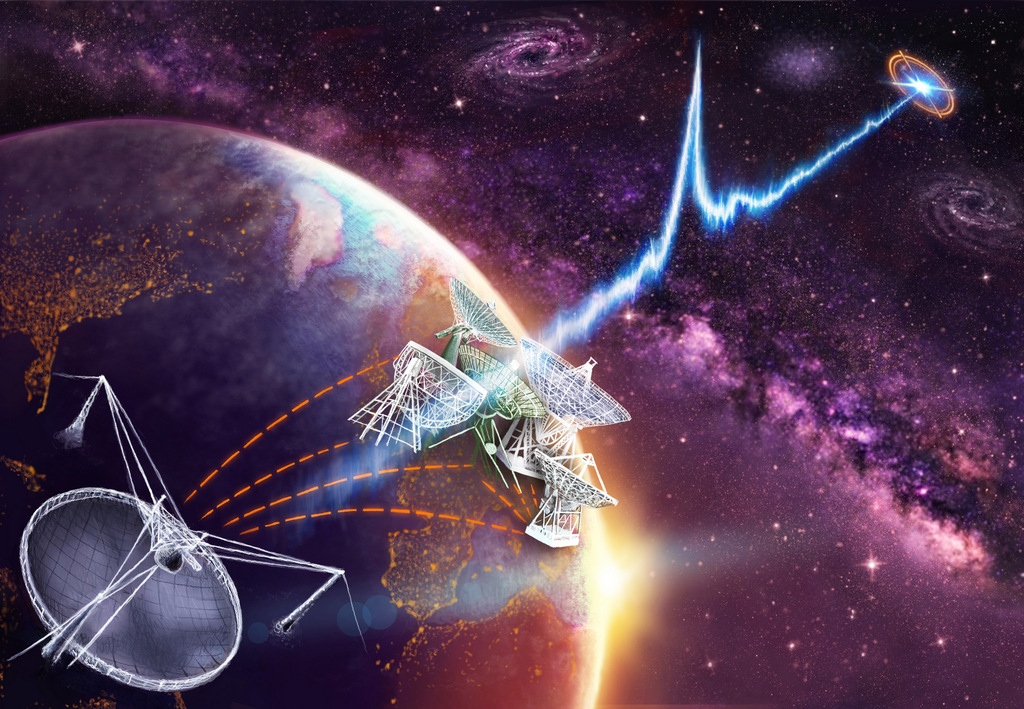

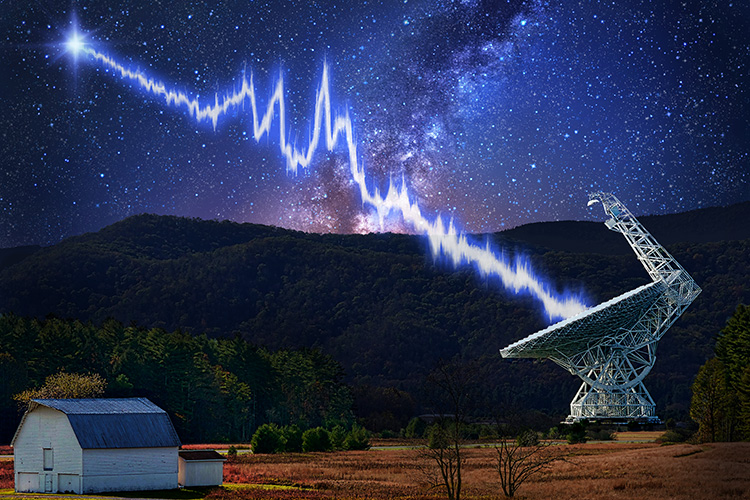

In [ ]:
#-> Importing_google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#-> Install the python version
!apt-get install python3.7

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3.7 is already the newest version (3.7.13-1+bionic3).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
 #-> Importing required Libraries:::

import numpy as np         #-> linear algebra
import pandas as pd        #-> data processing, CSV file I/O (e.g. pd.read_csv)
#-> Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
#-> performance metrics for classification model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
import warnings
warnings.simplefilter("ignore")
np.random.seed(42)
print("Tensorflow Version is :",tf.__version__)

Tensorflow Version is : 2.8.2


-----------------------------------------The dataset consists of 2-Dimensional spectrograms of radio signals from space collected at the SETI Institute by the Allen Telescope Array. The objective is to classify the radio signals from outer space into one of four classes.-----------------------------------------

In [ ]:
#-> Load the Data-set
train_images = pd.read_csv("/content/drive/MyDrive/my kaggle/seti/train/images.csv",header=None)
train_labels = pd.read_csv("/content/drive/MyDrive/my kaggle/seti/train/labels.csv",header=None)
val_images = pd.read_csv("/content/drive/MyDrive/my kaggle/seti/validation/images.csv",header=None)
val_labels = pd.read_csv("/content/drive/MyDrive/my kaggle/seti/validation/labels.csv",header=None)

In [ ]:
#-> Display the Top of Data-set
train_images.head()

0         1         2         3         4         5         6     \
0  0.631373  0.623529  0.713726  0.705882  0.658824  0.666667  0.654902   
1  0.725490  0.752941  0.749020  0.701961  0.690196  0.721569  0.709804   
2  0.717647  0.701961  0.713726  0.733333  0.705882  0.717647  0.725490   
3  0.705882  0.674510  0.654902  0.678431  0.666667  0.662745  0.678431   
4  0.647059  0.729412  0.701961  0.674510  0.611765  0.698039  0.713726   

       7         8         9     ...      8182      8183      8184      8185  \
0  0.635294  0.647059  0.705882  ...  0.682353  0.611765  0.650980  0.658824   
1  0.745098  0.654902  0.721569  ...  0.721569  0.698039  0.721569  0.686275   
2  0.682353  0.717647  0.674510  ...  0.709804  0.694118  0.705882  0.682353   
3  0.662745  0.686275  0.686275  ...  0.639216  0.662745  0.631373  0.643137   
4  0.662745  0.701961  0.674510  ...  0.639216  0.670588  0.705882  0.674510   

       8186      8187      8188      8189      8190      8191  
0  0.600000  0.603922  0.654902  0.694118  0.658824  0.666667  
1  0.713726  0.682353  0.690196  0.698039  0.701961  0.725490  
2  0.639216  0.713726  0.670588  0.678431  0.737255  0.674510  
3  0.705882  0.662745  0.705882  0.666667  0.654902  0.631373  
4  0.721569  0.694118  0.674510  0.705882  0.749020  0.729412  

[5 rows x 8192 columns]

In [ ]:
#-> Display the Bottom of Data-set
train_labels.head()

0    1    2    3
0  1.0  0.0  0.0  0.0
1  1.0  0.0  0.0  0.0
2  1.0  0.0  0.0  0.0
3  1.0  0.0  0.0  0.0
4  1.0  0.0  0.0  0.0

There are 4 labels for the radio signasl according to their features. The first label is represented in the columns zero and the name of this radio signal is Squiggle. We can see the representation of this type of radio signal in the image below:



Text(0.5, 1.0, 'Squiggle Radio Signals')

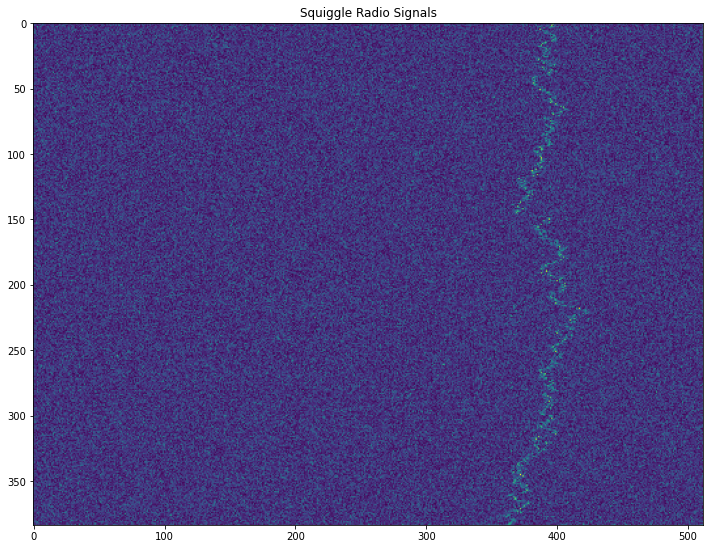

In [ ]:
plt.figure(figsize=(12,10))
plt.imshow(plt.imread("/content/drive/MyDrive/my kaggle/seti/primary_small/squiggle/1015_squiggle.png"))
plt.title("Squiggle Radio Signals")

The second column represents narrowband signal as label which we can see the signal visualization in the image below:

Text(0.5, 1.0, 'Narrowband Radio Signals')

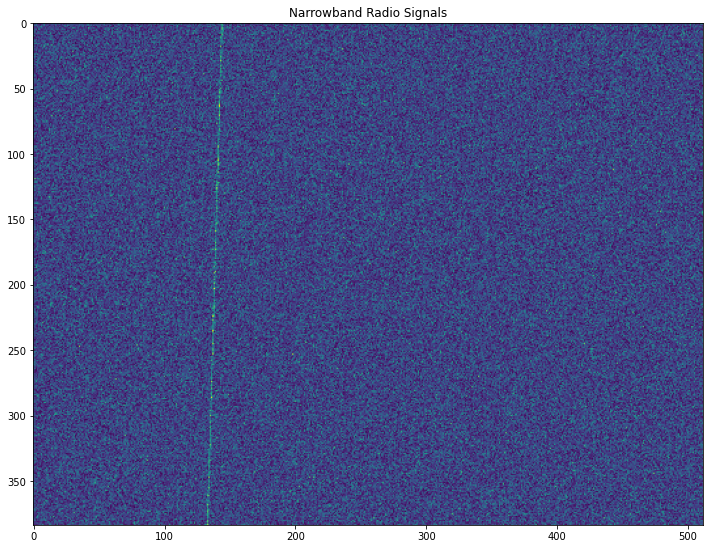

In [ ]:
plt.figure(figsize=(12,10))
plt.imshow(plt.imread("/content/drive/MyDrive/my kaggle/seti/primary_small/narrowband/1012_narrowband.png"))
plt.title("Narrowband Radio Signals")

The third column represents Noise as label which we can see the signal visualization in the image below:

Text(0.5, 1.0, 'Noises')

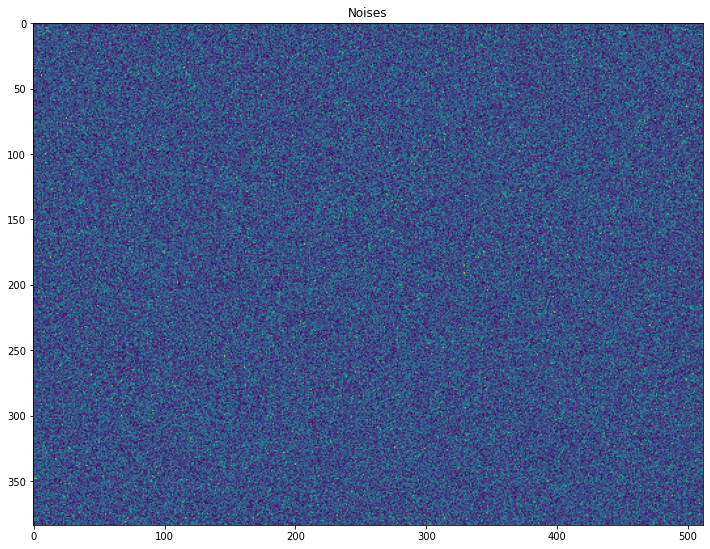

In [ ]:
plt.figure(figsize=(12,10))
plt.imshow(plt.imread("/content/drive/MyDrive/my kaggle/seti/primary_small/noise/1001_noise.png"))
plt.title("Noises")

The fourth column represents narrowbanddrd signal as label which we can see the signal visualization in the image below:

Text(0.5, 1.0, 'Narrowbanddrd Radio Signals')

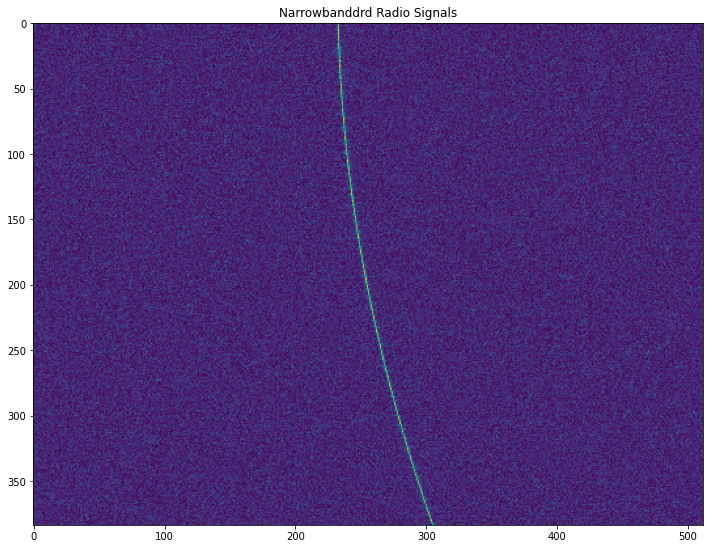

In [ ]:
plt.figure(figsize=(12,10))
plt.imshow(plt.imread("/content/drive/MyDrive/my kaggle/seti/primary_small/narrowbanddrd/1006_narrowbanddrd.png"))
plt.title("Narrowbanddrd Radio Signals")

2. Data Preprocessing and Visualization

In [ ]:
print("Training set shape:", train_images.shape, train_labels.shape)
print("Validation set shape:", val_images.shape, val_labels.shape)

Training set shape: (3200, 8192) (3200, 4)
Validation set shape: (800, 8192) (800, 4)


We have 3200 samples in the training set and 800 in the test set. We need to transform the shape of the image in the both train and test set into smaller image before sending convolutional neural networks as follows.The first one represents the number of samples, the second is width of the images. the third is the height and the last one is number of rgb channels

In [ ]:
X_train = train_images.values.reshape(3200,64,128,1) 
X_test = val_images.values.reshape(800,64,128,1)
y_train = train_labels.values
y_test = val_labels.values
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3200, 64, 128, 1)
(800, 64, 128, 1)
(3200, 4)
(800, 4)


In [ ]:
print(X_train.ndim)
print(X_test.ndim)
print(y_train.ndim)
print(y_test.ndim)

4
4
2
2


X_train and X_test which represents the features of the radio signals are 4D numpy arrays as seen in the example below:

In [ ]:
X_train[0]

array([[[0.631373],
        [0.623529],
        [0.713726],
        ...,
        [0.615686],
        [0.658824],
        [0.705882]],

       [[0.662745],
        [0.666667],
        [0.65098 ],
        ...,
        [0.647059],
        [0.670588],
        [0.690196]],

       [[0.6     ],
        [0.643137],
        [0.635294],
        ...,
        [0.670588],
        [0.639216],
        [0.705882]],

       ...,

       [[0.666667],
        [0.678431],
        [0.643137],
        ...,
        [0.670588],
        [0.580392],
        [0.635294]],

       [[0.603922],
        [0.619608],
        [0.588235],
        ...,
        [0.701961],
        [0.65098 ],
        [0.647059]],

       [[0.52549 ],
        [0.533333],
        [0.631373],
        ...,
        [0.694118],
        [0.658824],
        [0.666667]]])

y_train and y_test which represents the labels of the radio signals are 2D numpy arrays as seen in the example below:

In [ ]:
y_train[0]

array([1., 0., 0., 0.])

Now lets visualize how the images look like:

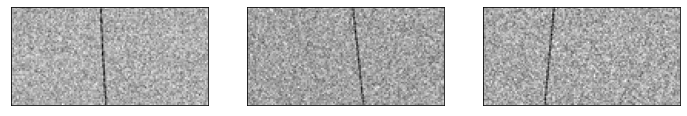

In [ ]:
plt.figure(0, figsize=(12,12))
for i in range(1,4):
    plt.subplot(1,3,i)
    img = np.squeeze(X_train[np.random.randint(0, X_train.shape[0])])
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap='gray')

We see gray color representations of the images:

3. Create Training and Validation Data Generators and CNN Model

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        horizontal_flip=True)
test_datagen = ImageDataGenerator(
        horizontal_flip=True)
train_datagen.fit(X_train)
test_datagen.fit(X_test)

3.1. Building the Model


> Convolutional layer takes an input volume Applies a filter at every position of the input Outputs another volume (usually of different size). Similar to the Convolutional Layer, the Pooling layer is responsible for reducing the spatial size of the Convolved Feature. It is used to decrease the computational power required to process the data through dimensionality reduction. Furthermore, it is useful for extracting dominant features




In [ ]:
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import plot_model
import warnings; warnings.simplefilter('ignore')

In [ ]:
cnn = Sequential()
#Adding 1. Convolution Layer
cnn.add(Conv2D(filters=32,kernel_size=5,activation="relu",padding="same", input_shape=(64,128,1))) 
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=2, strides=2))
cnn.add(Dropout(0.2))

#Adding 2. Convolution Layer
cnn.add(Conv2D(filters=32,kernel_size=5,activation="relu",padding="same"))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=2, strides=2))
cnn.add(Dropout(0.2))

# Adding Flattening
cnn.add(Flatten())

# Adding fully connected layer
cnn.add(Dense(units=1024, activation="relu"))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.4))   

cnn.add(Dense(4, activation='softmax'))

3.2. Learning Rate Scheduling and Compile the Model
.
.

.
.
.
> This will calculate 0.005 * (0.96 **5) in every 5 steps and recalculate learning steps and the result of this operation as the learning step.




In [ ]:
initial_learning_rate = 0.005
learning_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
                    initial_learning_rate,
                    decay_steps=5,
                    decay_rate=0.96,
                    staircase=True)
# This will calculate 0.005 * (0.96 **5) in every 5 steps and recalculate learning steps and the result of this operation as the leanring step
optimizer = Adam(learning_rate=learning_schedule)


In [ ]:
cnn.compile(optimizer=optimizer, loss="categorical_crossentropy",metrics=["accuracy"])
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 64, 128, 32)       832       
                                                                 
 batch_normalization_3 (Batc  (None, 64, 128, 32)      128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 64, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 32, 64, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 64, 32)        25632     
                                                                 
 batch_normalization_4 (Batc  (None, 32, 64, 32)      

3.3.Training the Model





> ModelCheckpoint enables us to save the highest accurate weights to use it for future predictions.




In [ ]:
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_loss',
                             save_weights_only=True, mode='min', verbose=0)
callbacks = [checkpoint,EarlyStopping(monitor='val_loss',patience=4)]
batch_size = 32
history = cnn.fit(
    train_datagen.flow(X_train, y_train, batch_size=batch_size, shuffle=True),
    steps_per_epoch=len(X_train)//batch_size,
    validation_data = test_datagen.flow(X_test, y_test, batch_size=batch_size, shuffle=True),
    validation_steps = len(X_test)//batch_size,
    epochs=50,
    callbacks=callbacks
)

Epoch 1/50
100/100 [==============================] - 98s 969ms/step - loss: 0.8579 - accuracy: 0.6569 - val_loss: 3.4354 - val_accuracy: 0.2500
Epoch 2/50
100/100 [==============================] - 97s 968ms/step - loss: 0.6164 - accuracy: 0.6906 - val_loss: 5.2519 - val_accuracy: 0.2550
Epoch 3/50
100/100 [==============================] - 95s 953ms/step - loss: 0.4972 - accuracy: 0.7175 - val_loss: 6.8081 - val_accuracy: 0.5000
Epoch 4/50
100/100 [==============================] - 95s 954ms/step - loss: 0.4465 - accuracy: 0.7431 - val_loss: 7.0259 - val_accuracy: 0.5013
Epoch 5/50
100/100 [==============================] - 111s 1s/step - loss: 0.4161 - accuracy: 0.7538 - val_loss: 6.1745 - val_accuracy: 0.5063


4. MAKING PREDICTIONS AND EVALUATING THE MODEL PERFORMANCE

In [ ]:
pd.DataFrame(cnn.history.history)

loss  accuracy  val_loss  val_accuracy
0  0.857932  0.656875  3.435355       0.25000
1  0.616416  0.690625  5.251918       0.25500
2  0.497172  0.717500  6.808119       0.50000
3  0.446498  0.743125  7.025934       0.50125
4  0.416137  0.753750  6.174480       0.50625

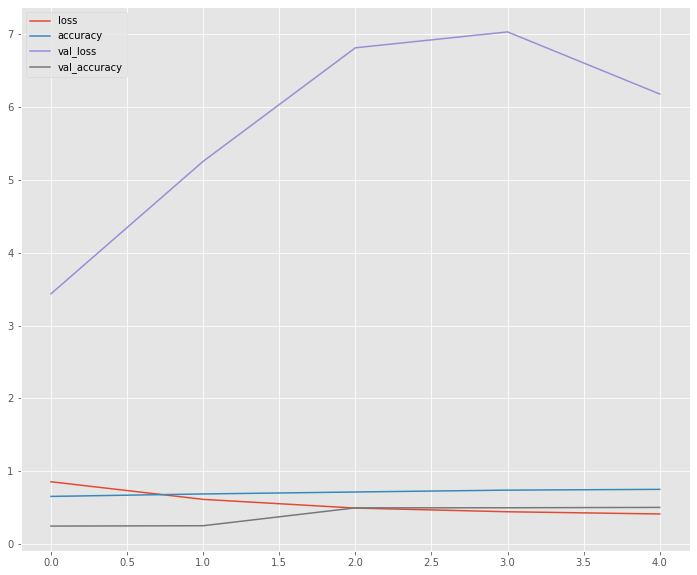

In [ ]:
plt.style.use("ggplot")
pd.DataFrame(cnn.history.history).plot(figsize=(12,10))

In [ ]:
print(cnn.evaluate(X_train,y_train))

100/100 [==============================] - 18s 176ms/step - loss: 6.1772 - accuracy: 0.5038
[6.177171230316162, 0.5037500262260437]


In [ ]:
print(cnn.evaluate(X_test,y_test))

25/25 [==============================] - 4s 176ms/step - loss: 6.1641 - accuracy: 0.5075
[6.164058208465576, 0.5074999928474426]


In [ ]:
predictions = cnn.predict(X_test)
y_true = np.argmax(y_test, 1)
y_pred = np.argmax(predictions, 1)
print(metrics.classification_report(y_true, y_pred))
print("Classification accuracy: %0.6f" % metrics.accuracy_score(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       200
           1       0.34      0.94      0.50       200
           2       0.36      0.09      0.14       200
           3       0.99      1.00      1.00       200

    accuracy                           0.51       800
   macro avg       0.42      0.51      0.41       800
weighted avg       0.42      0.51      0.41       800

Classification accuracy: 0.507500


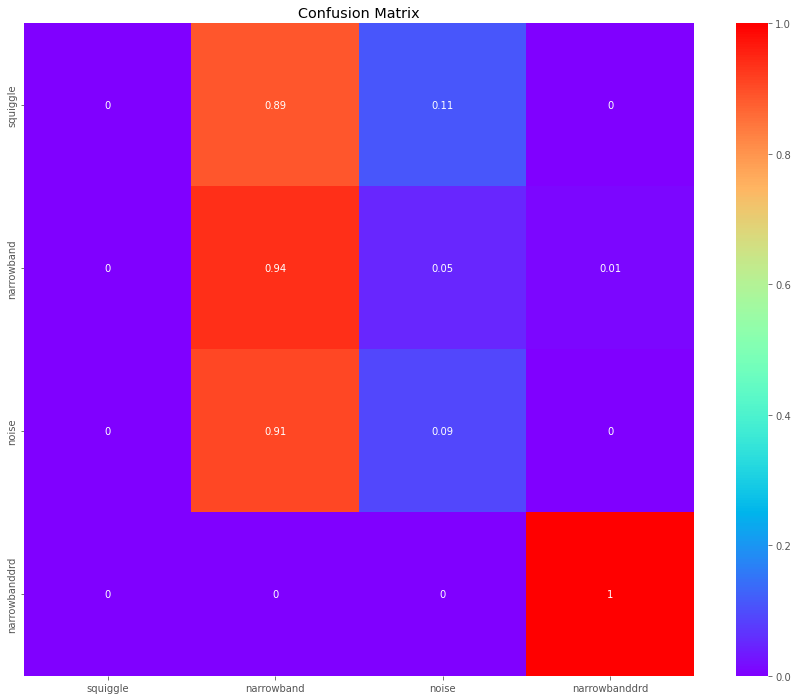

In [ ]:
labels = ["squiggle", "narrowband", "noise", "narrowbanddrd"]
plt.figure(figsize=(15,12))
ax= plt.subplot()
sns.heatmap(metrics.confusion_matrix(y_true, y_pred, normalize='true'), annot=True, ax=ax,cmap="rainbow"); #annot=True to annotate cells

# labels, title and ticks
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

In [ ]:
np.argmax(predictions,1)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,

In [ ]:
np.argmax(y_test,1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
predictions_df = pd.DataFrame(np.argmax(predictions,1),columns=["Predictions"])
y_test_df = pd.DataFrame(np.argmax(y_test,1),columns=["Real Values"])
comparison_df = pd.concat([y_test_df, predictions_df],axis=1)
comparison_df 

Real Values  Predictions
0              0            1
1              0            1
2              0            1
3              0            1
4              0            1
..           ...          ...
795            1            1
796            1            1
797            1            1
798            1            2
799            1            1

[800 rows x 2 columns]

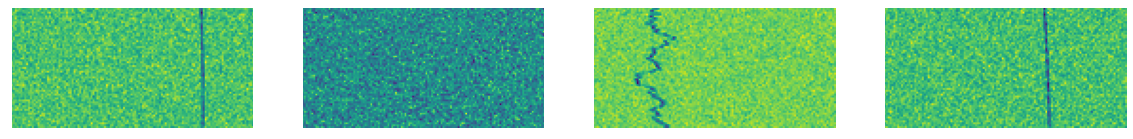

In [ ]:
plt.figure(0, figsize=(20,15))
for i in range(1,5):
    plt.subplot(1,4,i)
    img = np.squeeze(X_train[np.random.randint(0, X_train.shape[0])])
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)

In [ ]:
labels = ["squiggle",  "narrowband","noise" ,"narrowbanddrd",]
labels[comparison_df["Predictions"][0]]

'narrowband'

**-------------------Conclusion---------------------**


> Our model performs good, but have a confusion between narrowband and narrowbanddrd radio signasl because they are so similar, this can be retrained by hyperparameter tuning for better accuracy.





